# 📘 Algoritmo de Q-learning

## 🧠 ¿Qué es Q-learning?

**Q-learning** es un algoritmo de **aprendizaje por refuerzo (Reinforcement Learning - RL) off-policy** que permite a un agente aprender una política óptima para tomar decisiones mediante la interacción con un entorno. Fue propuesto por **Watkins y Dayan en 1992 [1]**.

Es un algoritmo **off-policy** y **basado en valores**, lo que significa que aprende el valor de las acciones independientemente de la política actual que sigue el agente.

---

## 📂 Categoría dentro de RL

- 🏷 **Tipo:** Off-policy  
- 🏷 **Basado en:** Valores  
- 🧠 **Aprende una función de valor $Q(s, a)$**: el valor esperado al tomar una acción $a$ en un estado $s$ y seguir la política óptima después.  
- 📊 **Utiliza una tabla $Q$ (Q-table)** para entornos discretos.  

---

## 🎯 Características importantes de Q-learning

- No requiere un modelo del entorno (*model-free*).
- Utiliza aprendizaje temporal (*Temporal Difference Learning*).
- Puede converger a una política óptima bajo ciertas condiciones (como exploración adecuada y tasa de aprendizaje decreciente).

---
## 🧮 Pseudocódigo del algoritmo Q-learning

### 📥 **Entrada**:
**Información del algoritmo**
- $\alpha$ : tasa de aprendizaje (learning rate)  
- $\gamma$: factor de descuento (discount factor)  
- $\epsilon$: tasa de exploración inicial (epsilon)  
- $\epsilon_{min}$: valor mínimo de epsilon  
- $\epsilon_{decay}$: factor de decaimiento de epsilon  
- $Episodes$: número total de episodios  
- $Max\_steps$: número máximo de pasos por episodio  

**Información del entorno**
- $A$: conjunto de acciones posibles  
- $S$: conjunto de estados posibles  

### 📤 Salida:
- $Q$: tabla $Q(s, a)$ aprendida con los valores de acción

### 📤 Configuración:
  1. Inicializar $Q(s, a)$ a ceros para todos los estados $s$ y acciones $a$.

### 📤 Ejecución:
  1. Repetir por cada episodio < Episodes:

     2. Inicializar el estado $s$ (normalmente aleatorio)

     3. Repetir por cada paso en el episodio < Max-steps:

        4. Generar una variable aleatoria, si esta es mayor a $\epsilon$:
           
           Seleccionar una acción a aleatoria (exploración)
        5. De lo contrario:
           
           Seleccionar acción de la tabla $Q$, $a = \max_a Q(s_t, a_t)$ (explotación)
        6. Aplicar el paso con la acción $a_t$, obteniendo la recompensa $r_t$ y el nuevo estado $s_{t+1}$

        7. Actualizar la tabla $Q$:
        $ Q_{t+1}(s_t,a_t) \leftarrow Q_t(s_t,a_t) + \alpha \left( r_t + \gamma \max_a{Q_t(s_{t+1},a)} - Q_t(s_t,a_t) \right) $

        8. $s_t$ ← $s_{t+1}$

        9. Si $s_t$ es un estado terminal, terminar el episodio

---

## 📐 Ecuación de actualización basado en la ecuación de Bellman

Así, Q-Learning optimiza la tabla siguiendo un proceso iterativo de actualizaciones ($t=0,1,2,\ldots$).
Dando pie a la siguiente ecuación:
$$ Q_{t+1}(s_t,a_t) = Q_t(s_t,a_t) + \alpha \left( r_t + \gamma \max_a{Q_t(s_{t+1},a)} - Q_t(s_t,a_t) \right) $$

Así, aplicando la acción $a_t$ en el estado $s_t$, se obtiene una recompensa $r_t$ y un nuevo estado $s_{t+1}$.

* La siguiente acción óptima debe cumplir $a_{t+1}=\max_{a}{Q(s_{t+1},a)}$ obteniendo la recompensa esperada: $r_t + \gamma \max_{a}{Q(s_{t+1},a)}$, con $\gamma$ como factor de descuento (olvido).
* comparar este valor-Q óptimo con el valor-Q actual $Q(s_t,a_t)$ en la tabla-$Q$. Entonces se actualiza el valor-Q actual por una tasa de aprendizaje $\alpha$.<br>

---

Q-learning es el algoritmo de aprendizaje por refuerzo mas antiguo, pero más utilizado para aprender conceptos básicos.

Para entender como trabaja, primero consideremos la recompensa esperada.

$$ R = \sum_{t=0}^{\infty} {\gamma^t r_t} $$

donde $r_t$ es una valor de recompensa (retorno) obtenido en el el tiempo $t$ y $\gamma$ es una tasa de descuento.

Como ejemplo para entender esta recompensa, imagina que quieres tomar un objeto con tu brazo de la mesa. Para esto necesitas realizar varias acciones:

1. Estirar (posicionar) el brazo para alcanzar el objeto: recompensa 0
2. Abrir la mano: recompensa 0
3. Cerrar la mano: recompensa 10

En este caso conseguiste una valor de recompensa hasta la acción #3 ($t=2$), sin embargo, las dos acciones anteriores contribuyen a la obtener esta recompensa final. Si consideramos que la acción #1 tiene la recompensa acumulada con el factor de descuento $\gamma=0.99$.

$$ R_{t=0} = 0 + 0.99 \times 0 + 0.99^2 \times 10 = 9.801 $$

Lo mismo para las recompensas posteriores, $R_{t=1} = 9.9, R_{t=2} = 10$.

---

## Algoritmo aplicado a un péndulo invertido

El entorno será modificado de manera externa debido a sus acciones continuas y el algoritmo trabaja con acciones discretas.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    COLAB = True
    print("Nota: Usando Google CoLab")
except:
    print("Nota: Usando JupyterNotebook")
    COLAB = False

from IPython.display import Image, display
# Si estas en colab ejecutar. Para Jupyter realizar en consola
if COLAB:
  !pip install gymnasium
  !pip install numpy matplotlib
  !pip install renderlab
  !apt update && apt install xvfb
  !pip install gym-notebook-wrapper
else:
  %pip install gym-notebook-wrapper
  %pip install numpy matplotlib
  %pip install gymnasium
  %pip install renderlab

from IPython.display import clear_output
import warnings
import gymnasium as gym
import numpy as np
import renderlab as rl
import matplotlib.pyplot as plt
import pickle

warnings.filterwarnings('ignore')
clear_output()

### Simulación sin entrenamiento

In [2]:
env = gym.make("Pendulum-v1", render_mode = "rgb_array") # Instancia el entorno
env = rl.RenderFrame(env, "./output") # Inicializa la carpeta para render

#observation, info = env.reset() #Reinicia el entorno y genera la primera imagen
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

# Ejecución del entorno con acciones aleatorias

# Hiperparámetros
episodes = 1
max_steps = 200

for episode in range(episodes):
    obs, _ = env.reset()

    for _ in range(max_steps):
        action = env.action_space.sample()
        next_obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        if done:
            break
    env.play()
env.close()

Action Space: Box(-2.0, 2.0, (1,), float32)
Observation Space: Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


### Entrenamiento

In [3]:
def train(env):
    print(f"Entrenamiento iniciado")
    # hiperparámetros
    rewards_records = []
    learning_rate_a = 0.1        # tasa de aprendizaje
    discount_factor_g = 0.9      # factor de descuento
    epsilon = 1                  # acciones aleatorias
    epsilon_decay_rate = 0.0005  # epsilon decay rate
    epsilon_min = 0.05           # epsilon minimo
    divisions = 15               # divisiones de los estados continuos a discretos
    episodes = 10000
    best_reward = -99999


    # Divide las observaciones en estados discretos
    x  = np.linspace(env.observation_space.low[0], env.observation_space.high[0], divisions)
    y  = np.linspace(env.observation_space.low[1], env.observation_space.high[1], divisions)
    w  = np.linspace(env.observation_space.low[2], env.observation_space.high[2], divisions)

    # Divide las acciones en acciones discretas
    a = np.linspace(env.action_space.low[0], env.action_space.high[0], divisions)

    # inicia la tabla-Q de 16x16x16x16
    q = np.zeros((len(x)+1, len(y)+1, len(w)+1, len(a)+1))

    i = 0

    while(i<episodes):

        state = env.reset()[0]
        s_i0  = np.digitize(state[0], x)
        s_i1  = np.digitize(state[1], y)
        s_i2  = np.digitize(state[2], w)

        rewards = 0
        steps = 0

        # Empiezan el episodio
        while(steps < 1000):
            # Selección de acción epsilon-greedy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
                action_idx = np.digitize(action, a)
            else:
                action_idx = np.argmax(q[s_i0, s_i1, s_i2, :])
                action = a[action_idx-1]

            # Aplica la acción
            new_state,reward,_,_,_ = env.step([action])

            # Discretiza el nuevo estado
            ns_i0  = np.digitize(new_state[0], x)
            ns_i1  = np.digitize(new_state[1], y)
            ns_i2  = np.digitize(new_state[2], w)

            # Actualiza la tabla-Q
            q[s_i0, s_i1, s_i2, action_idx] = \
                q[s_i0, s_i1, s_i2, action_idx] + \
                learning_rate_a * (
                    reward + discount_factor_g*np.max(q[ns_i0, ns_i1, ns_i2,:])
                        - q[s_i0, s_i1, s_i2, action_idx]
                )

            state = new_state
            s_i0 = ns_i0
            s_i1 = ns_i1
            s_i2 = ns_i2

            rewards += reward
            steps += 1

            if rewards>best_reward:
                best_reward = rewards

                # Salva la tabla-Q cuando tiene una mejora
                f = open('pendulum.pkl','wb')
                pickle.dump(q, f)
                f.close()

        rewards_records.append(rewards)

        # Da un avance del entrenamiento
        if i!=0 and i%1000==0:
            mean_reward = np.mean(rewards_records[len(rewards_records)-100:])
            print(f'Episodio: {i}, Epsilon: {epsilon:0.2f}, Mejor recompensa: {best_reward}, Recompensa media {mean_reward:0.1f}')

            # Grafica las recompensas promedio
            mean_rewards = []
            for t in range(i):
                mean_rewards.append(np.mean(rewards_records[max(0, t-100):(t+1)]))
            plt.plot(mean_rewards)
            plt.savefig(f'pendulum.png')

        # disminuye epsilon
        epsilon = max(epsilon - epsilon_decay_rate, epsilon_min)
        i+=1
    env.close()
    return rewards_records

def eval(env, save=False):
  divisions = 15

  x  = np.linspace(env.observation_space.low[0], env.observation_space.high[0], divisions)
  y  = np.linspace(env.observation_space.low[1], env.observation_space.high[1], divisions)
  w  = np.linspace(env.observation_space.low[2], env.observation_space.high[2], divisions)

  a = np.linspace(env.action_space.low[0], env.action_space.high[0], divisions)

  # Carga la tabla-Q si esta en la misma sesión
  f = open('pendulum.pkl', 'rb')
  q = pickle.load(f)
  f.close()

  # Guardar el archivo con pickle
  if save:
    ruta_guardado = '/content/drive/My Drive/Colab Notebooks/pendulum.pkl'
    with open(ruta_guardado, 'wb') as f:
      pickle.dump(q, f)
    print(f"Archivo guardado en: {ruta_guardado}")

  best_reward = -99999
  i = 0
  state = env.reset()[0]
  s_i0  = np.digitize(state[0], x)
  s_i1  = np.digitize(state[1], y)
  s_i2  = np.digitize(state[2], w)

  rewards = 0
  steps = 0

  while(steps < 500):

    # Selecciona una acción ya con el algoritmo entrenado desde la tabla-Q
    action_idx = np.argmax(q[s_i0, s_i1, s_i2, :])
    action = a[action_idx-1]

    new_state,reward,_,_,_ = env.step([action])

    ns_i0  = np.digitize(new_state[0], x)
    ns_i1  = np.digitize(new_state[1], y)
    ns_i2  = np.digitize(new_state[2], w)

    state = new_state
    s_i0 = ns_i0
    s_i1 = ns_i1
    s_i2 = ns_i2

    rewards += reward
    steps += 1
  env.play()
  print(f'Reward: {rewards:0.1f}')
  env.close()


Entrenamiento iniciado
Episodio: 1000, Epsilon: 0.50, Mejor recompensa: -0.00930949895943289, Recompensa media -4693.4
Episodio: 2000, Epsilon: 0.05, Mejor recompensa: -0.008266744601073866, Recompensa media -1129.0
Episodio: 3000, Epsilon: 0.05, Mejor recompensa: -0.0015221060037256262, Recompensa media -694.3
Episodio: 4000, Epsilon: 0.05, Mejor recompensa: -0.0010232498015210474, Recompensa media -541.6
Episodio: 5000, Epsilon: 0.05, Mejor recompensa: -0.0004987198960619545, Recompensa media -395.0
Episodio: 6000, Epsilon: 0.05, Mejor recompensa: -0.0004987198960619545, Recompensa media -387.6
Episodio: 7000, Epsilon: 0.05, Mejor recompensa: -0.0004987198960619545, Recompensa media -376.3
Episodio: 8000, Epsilon: 0.05, Mejor recompensa: -0.0004987198960619545, Recompensa media -411.7
Episodio: 9000, Epsilon: 0.05, Mejor recompensa: -0.0004987198960619545, Recompensa media -371.2


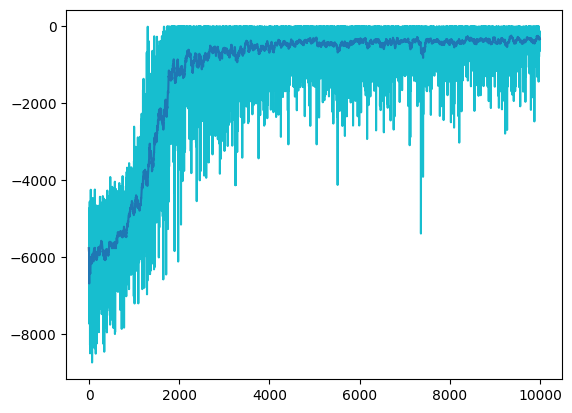

In [4]:
env = gym.make('Pendulum-v1', render_mode=None)
reward_records = train(env)

import matplotlib.pyplot as plt
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
# Plot
plt.plot(reward_records)
plt.plot(average_reward)

### Evaluación del aprendizaje

In [5]:
env = gym.make('Pendulum-v1', render_mode='rgb_array')
env = rl.RenderFrame(env, "./output") # Inicializa la carpeta para render
eval(env,True)

Archivo guardado en: /content/drive/My Drive/Colab Notebooks/pendulum.pkl
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Reward: -379.3


---

## Algoritmo aplicado al CartPole

### Simulación con acciones aleatorias

In [6]:
import gymnasium as gym
import renderlab as rl
import numpy as np
import math

env = gym.make("CartPole-v1", render_mode = "rgb_array")
env = rl.RenderFrame(env, "./output")

max_steps = 700
obs, _ = env.reset()

for _ in range(max_steps):
  action = env.action_space.sample()
  obs, reward, terminated, truncated, info = env.step(action)

env.play()
env.close()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


CartPole tiene 4 elementos continuos (float) en el espacio de observación. Para poder aplicar el algoritmo de Q-learning original, es necesario convertir los estdos continuos (**discretos**).
En este ejemplo, se convierte la tupla (Box, Box, Box, Box) en tuplas (Discrete(20), Discrete(20), Discrete(20), Discrete(20)) - que convierte valores flotantes a el valor de cada segemento en que aparece.

![discretize](https://github.com/tsmatz/reinforcement-learning-tutorials/blob/master/assets/discretize.png?raw=1)

In [7]:
env = gym.make("CartPole-v1")
bin = 20
new_observation_shape = (bin, bin, bin, bin)

bins = []
total_states = 4
for i in range(total_states):
    item = np.linspace(
        env.observation_space.low[i] if (i == 0) or (i == 2) else -4,
        env.observation_space.high[i] if (i == 0) or (i == 2) else 4,
        num=new_observation_shape[i],
        endpoint=False)
    item = np.delete(item, 0)
    bins.append(item)
    print(bins[i])

# Funcion para convertir a estados discretos
def get_discrete_state(s):
    new_s = []
    for i in range(total_states):
        new_s.append(np.digitize(s[i], bins[i]))
    return new_s

# Consigue una acción desde la tabla-Q con exploración greedy
def pick_sample(s, eval):
    # consigue una acción óptima,
    # pero con exploración greedy previene mínimos locales en los episodios iniciales
    if np.random.random() > epsilon or eval==1:
        a = np.argmax(q_table[tuple(s)])
    else:
        a = np.random.randint(0, env.action_space.n)
    return a

[-4.32       -3.8400002  -3.3600001  -2.88       -2.4        -1.9200001
 -1.44       -0.96000004 -0.48000002  0.          0.48000002  0.96000004
  1.44        1.9200001   2.4         2.88        3.3599997   3.8400002
  4.3200006 ]
[-3.6 -3.2 -2.8 -2.4 -2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6
  2.   2.4  2.8  3.2  3.6]
[-0.37699112 -0.3351032  -0.29321533 -0.25132743 -0.20943952 -0.16755164
 -0.12566373 -0.08377582 -0.04188791  0.          0.04188788  0.08377576
  0.1256637   0.16755158  0.20943952  0.2513274   0.29321527  0.3351032
  0.3769911 ]
[-3.6 -3.2 -2.8 -2.4 -2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6
  2.   2.4  2.8  3.2  3.6]


Después se tiene que gnerar una tabla-Q $Q(s,a)$ e iniciar todos sus valores a 0.

In [8]:
q_table = np.zeros(new_observation_shape + (env.action_space.n,))
q_table.shape

(20, 20, 20, 20, 2)

Ahora, hay que actualizar la tabla-Q con el algoritmo de Q-learning con el algoritmo de exploración $\epsilon$-Greedy.

In [9]:
env = gym.make("CartPole-v1")

# Hyperparametros

gamma = 0.99
alpha = 0.1
epsilon = 1
epsilon_decay = epsilon / 4000
episodes = 10000
reward_records = []

for i in range(episodes):
    done = False
    total_reward = 0
    s, _ = env.reset()
    s_dis = get_discrete_state(s)
    while not done:
        a = pick_sample(s_dis, 0)
        s, r, term, trunc, _ = env.step(a)
        done = term or trunc
        s_dis_next = get_discrete_state(s)

        # actualiza la tabla-Q
        maxQ = np.max(q_table[tuple(s_dis_next)])
        q_table[tuple(s_dis)][a] += alpha * (r + gamma * maxQ - q_table[tuple(s_dis)][a])

        s_dis = s_dis_next
        total_reward += r
        #print(i)

    if i%100==0:
        print(f'episodio {i}, con recompensa {total_reward}')
    # Update epsilon for each episode
    if epsilon - epsilon_decay >= 0:
        epsilon -= epsilon_decay

    # Record total rewards in episode (max 500)
    reward_records.append(total_reward)

print("\nTermino")
env.close()

episodio 0, con recompensa 37.0
episodio 100, con recompensa 9.0
episodio 200, con recompensa 26.0
episodio 300, con recompensa 19.0
episodio 400, con recompensa 13.0
episodio 500, con recompensa 37.0
episodio 600, con recompensa 34.0
episodio 700, con recompensa 12.0
episodio 800, con recompensa 21.0
episodio 900, con recompensa 10.0
episodio 1000, con recompensa 32.0
episodio 1100, con recompensa 70.0
episodio 1200, con recompensa 30.0
episodio 1300, con recompensa 19.0
episodio 1400, con recompensa 57.0
episodio 1500, con recompensa 72.0
episodio 1600, con recompensa 43.0
episodio 1700, con recompensa 19.0
episodio 1800, con recompensa 15.0
episodio 1900, con recompensa 48.0
episodio 2000, con recompensa 47.0
episodio 2100, con recompensa 54.0
episodio 2200, con recompensa 29.0
episodio 2300, con recompensa 64.0
episodio 2400, con recompensa 91.0
episodio 2500, con recompensa 117.0
episodio 2600, con recompensa 161.0
episodio 2700, con recompensa 144.0
episodio 2800, con recompensa 

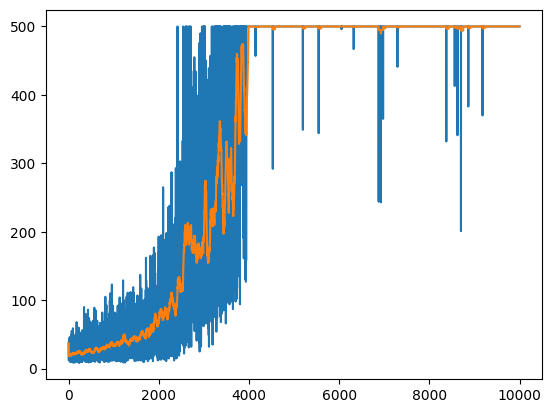

In [10]:
import matplotlib.pyplot as plt
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
# Plot
plt.plot(reward_records)
plt.plot(average_reward)

In [11]:
# Guardar el archivo con pickle
ruta_guardado = '/content/drive/My Drive/Colab Notebooks/cartpole.pkl'
with open(ruta_guardado, 'wb') as f:
    pickle.dump(q_table, f)
print(f"Archivo guardado en: {ruta_guardado}")

Archivo guardado en: /content/drive/My Drive/Colab Notebooks/cartpole.pkl


In [12]:
# Evaluación

env = gym.make("CartPole-v1", render_mode = "rgb_array")
env = rl.RenderFrame(env, "./output")
reward_records = []
eval_episode = 1
for i in range(eval_episode):
    done = False
    total_reward = 0
    r=0
    s, _ = env.reset()
    s_dis = get_discrete_state(s)
    while not done:
        a = pick_sample(s_dis,1)
        s, r, term, trunc, _ = env.step(a)
        done = term or trunc
        s_dis_next = get_discrete_state(s)
        s_dis = s_dis_next
        total_reward += r

    # Recompensa total del episodio (max 500)
    print("Evaluación {} con recompensa {}".format(i, total_reward), end="\r")
    env.play()
env.close()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


## 📚 Referencias

[1] Watkins, C. J. C. H., & Dayan, P. (1992). *Q-learning*. Machine Learning, 8, 279–292. https://doi.org/10.1007/BF00992698